# Classification of forest covertype

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types). 
<br> <br>
This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. 
<br> <br>
Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value. 
<br> <br>
As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4). 
<br><br>
The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values (elevation, etc.) Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition
<br><br>
Elevation / quantitative /meters / Elevation in meters <br>
Aspect / quantitative / azimuth / Aspect in degrees azimuth <br> 
Slope / quantitative / degrees / Slope in degrees <br>
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features<br> 
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features <br>
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway <br>
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice <br>
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice <br>
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice <br>
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points <br>
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation <br>
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation <br>
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation<br>
<br>

Ref: https://archive.ics.uci.edu/ml/datasets/covertype

**Imports**

In [97]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split as sksplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import scale
from sklearn import linear_model as lm
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold

**Data Loading**

In [5]:
raw_data=fetch_covtype()

In [6]:
raw_data.keys()

dict_keys(['data', 'target', 'DESCR'])

Elevation / quantitative /meters / Elevation in meters 
Aspect / quantitative / azimuth / Aspect in degrees azimuth 
Slope / quantitative / degrees / Slope in degrees 
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features 
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features 
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway 
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice 
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice 
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice 
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points 
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation 
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation 
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

In [26]:
column_names=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
wilderness_columns = ['w'+str(i) for i in range(4)]
column_names.extend(wilderness_columns)
soil_type_columns = ['st'+str(i) for i in range(40)]
column_names.extend(soil_type_columns)

In [29]:
raw_data_values= raw_data['data']
raw_data_values_pd=pd.DataFrame(raw_data_values,columns=column_names)
target_data_values_pd = pd.DataFrame(raw_data['target'])

Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
w0                                    float64
w1                                    float64
w2                                    float64
w3                                    float64
st0                                   float64
st1                                   float64
st2                                   float64
st3                                   float64
st4                                   float64
st5                                   float64
st6                                   float64
st7                               

# **Visualize the univariate distribution of each feature, and the distribution of the target.**

Text(0,0.5,'Counts')

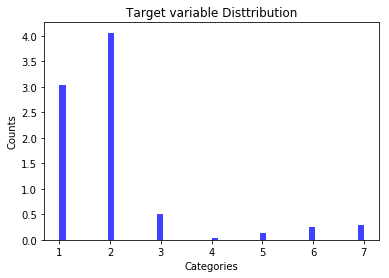

In [37]:
n, bins, patches = plt.hist(np.array(target_data_values_pd[0]), 50, density=True, facecolor='blue', alpha=0.75) 
plt.title('Target variable Disttribution')
plt.xlabel('Categories')
plt.ylabel('Counts')

Text(0.5,0.98,'Univariate Distribution of Continuous Valued Features')

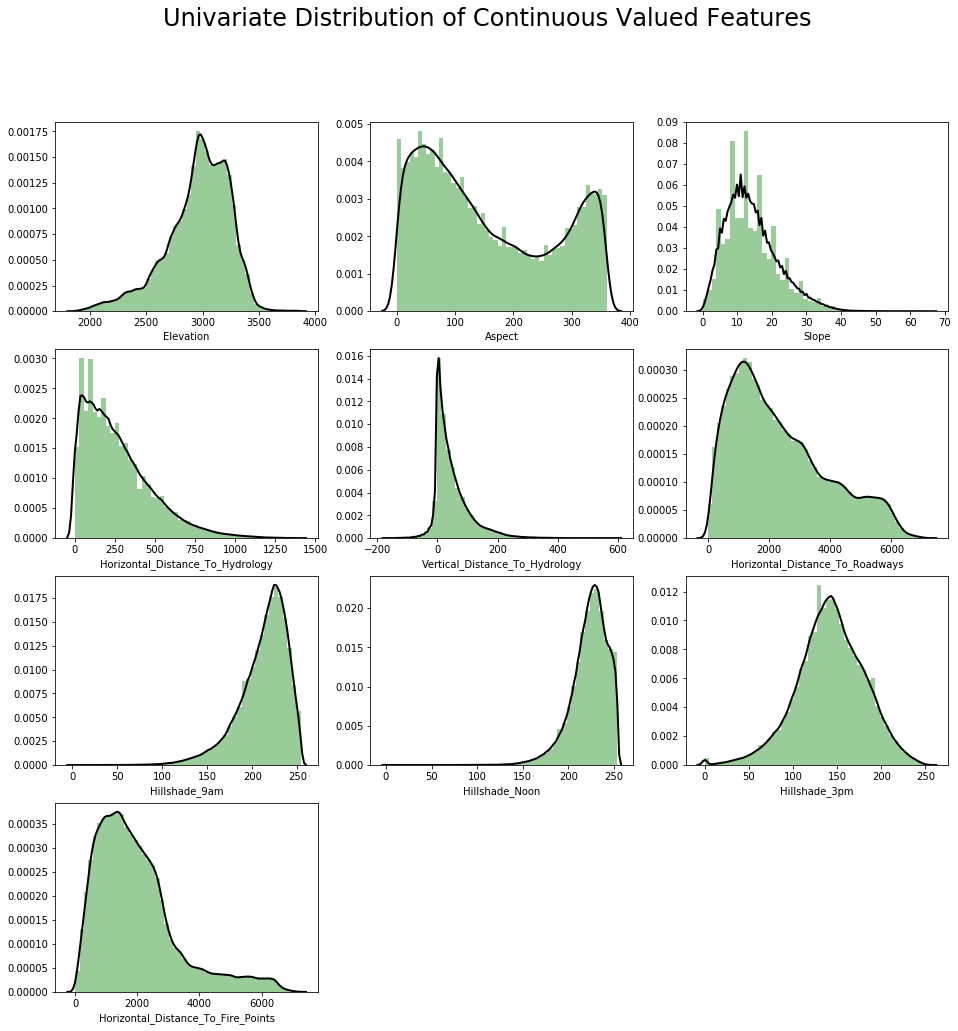

In [121]:
fig1, ax1 = plt.subplots(4,3,figsize=(16,16))
c=0
feature_names= raw_data_values_pd.columns
for i in range(4):
    for j in range(3):
        if c==10 or c==11:
            continue
        feature=feature_names[c]
        feature_data=raw_data_values_pd[feature]
        sns.distplot(feature_data,ax=ax1[i,j],kde_kws={"color": "k", "lw": 2},hist_kws={"color":"green"})
        ax1[i,j].set(xlabel=feature)
        c+=1
ax1[3,1].set_visible(False)
ax1[3,2].set_visible(False)
plt.suptitle('Univariate Distribution of Continuous Valued Features',fontsize=24)

# Evaluate Logistic Regression, linear support vector machines and nearest centroids using cross-validation. How different are the results? 

In [47]:
raw_data_values.shape

(581012, 54)

In [52]:
x_train,x_test,y_train,y_test=sksplit(raw_data_values,raw_data['target'])

logistic_regression_accuracy = np.mean(cross_val_score(lm.LogisticRegression(),x_train,y_train))
linearSvm_accuracy = np.mean(cross_val_score(LinearSVC(),x_train,y_train))
NCentroid_accuracy = np.mean(cross_val_score(NearestCentroid(),x_train,y_train))
# elasticnet_accuracy = np.mean(cross_val_score(lm.ElasticNet(),x_train,y_train))
models=['logistic_regression','linearSvm','NCentroid']
model_scores=dict(zip(models,[logistic_regression_accuracy,linearSvm_accuracy,NCentroid_accuracy]))

print(model_scores)

{'linearSvm': 0.47146463440476927, 'logistic_regression': 0.7110811241138925, 'NCentroid': 0.19328803072616738}


### How does scaling the data with StandardScaler influence the results?

In [54]:
x_train_scaled=scale(x_train)
x_test_scaled=scale(x_test)

scaled_logistic_regression_accuracy = np.mean(cross_val_score(lm.LogisticRegression(),x_train_scaled,y_train))
scaled_linearSvm_accuracy = np.mean(cross_val_score(LinearSVC(),x_train_scaled,y_train))
scaled_NCentroid_accuracy = np.mean(cross_val_score(NearestCentroid(),x_train_scaled,y_train))
# scaled_elasticnet_accuracy = np.mean(cross_val_score(lm.ElasticNet(),x_train_scaled,y_train))

model_scores_scaled_data=dict(zip(models,[scaled_logistic_regression_accuracy,scaled_linearSvm_accuracy,scaled_NCentroid_accuracy]))

print(model_scores_scaled_data)

{'linearSvm': 0.7130225717273161, 'logistic_regression': 0.7156409817001351, 'NCentroid': 0.5492462368608727}


# Tuning the parameters using GridSearchCV. Do the results improve?

### **Tuning the parameters of Logistic Regression:**

In [66]:
param_grid_lr = {'C': [0.001, 0.01, 0.1, 10]}
grid_lr = GridSearchCV(lm.LogisticRegression(dual=False,tol=0.005), param_grid_lr,return_train_score=True)
grid_lr.fit(x_train, y_train)

In [67]:
best_LR_Model= grid_lr.best_estimator_

##### Visualize the performance as function of the parameters for all three models.

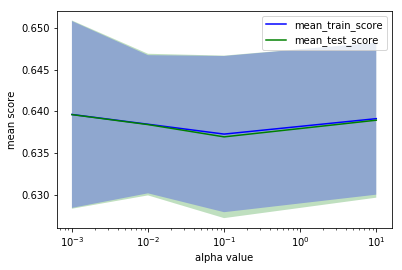

In [69]:
grid_results_LR = pd.DataFrame(grid_lr.cv_results_)
y_train_mean = grid_results_LR['mean_train_score']
y_train_std = grid_results_LR['std_train_score']
y_test_mean = grid_results_LR['mean_test_score']
y_test_std = grid_results_LR['std_test_score']
#gridsearch_cv_model_scores['ridge_regression'] =np.mean(y_test_mean)
x = param_grid_lr['C']
line1,=plt.plot(x,y_train_mean,color='blue')
line2,=plt.plot(x,y_test_mean,color='green')
plt.fill_between(x, y_test_mean - y_test_std,y_test_mean + y_test_std, facecolor = 'green', alpha = 0.25)
plt.fill_between(x, y_train_mean - y_train_std,y_train_mean + y_train_std, facecolor = 'blue', alpha = 0.25)
plt.xticks(x)
plt.xlabel('alpha value')
plt.ylabel('mean score')
plt.legend(handles=[line1,line2])
plt.xscale('log')

### **Tuning the parameters of Linear SVM:**

In [80]:
param_grid_svm = {'C': [0.001, 0.01, 0.1, 10]} #, 'gamma':[0.001, 0.01, 0.1, 1]}
grid_svm = GridSearchCV(LinearSVC(dual=False,tol=0.005), param_grid_svm,return_train_score=True)
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.005,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

##### Visualize the performance as function of the parameters for all three models.

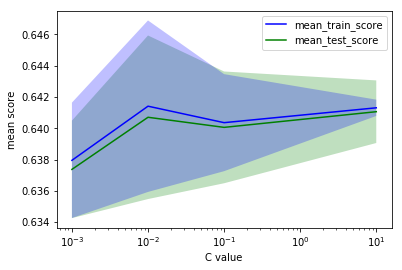

In [82]:
grid_results_svm = pd.DataFrame(grid_svm.cv_results_)
y_train_mean = grid_results_svm['mean_train_score']
y_train_std = grid_results_svm['std_train_score']
y_test_mean = grid_results_svm['mean_test_score']
y_test_std = grid_results_svm['std_test_score']
#gridsearch_cv_model_scores['ridge_regression'] =np.mean(y_test_mean)
x = param_grid_svm['C']
line1,=plt.plot(x,y_train_mean,color='blue')
line2,=plt.plot(x,y_test_mean,color='green')
plt.fill_between(x, y_test_mean - y_test_std,y_test_mean + y_test_std, facecolor = 'green', alpha = 0.25)
plt.fill_between(x, y_train_mean - y_train_std,y_train_mean + y_train_std, facecolor = 'blue', alpha = 0.25)
plt.xticks(x)
plt.legend(handles=[line1,line2])
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('mean score')
plt.show()

### **Tuning the parameters of NearestCentroid:**

In [86]:
param_grid_nc = {'metric': ['euclidean','manhattan'],'shrink_threshold':[0.05,0.1,0.5,0.75]}
grid_nc = GridSearchCV(NearestCentroid(), param_grid_nc,return_train_score=True)
grid_nc.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=NearestCentroid(metric='euclidean', shrink_threshold=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'metric': ['euclidean', 'manhattan'], 'shrink_threshold': [0.05, 0.1, 0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

##### Visualize the performance as function of the parameters for all three models.

Text(0.5,0,'shrink threshold value (metric = euclidean)')

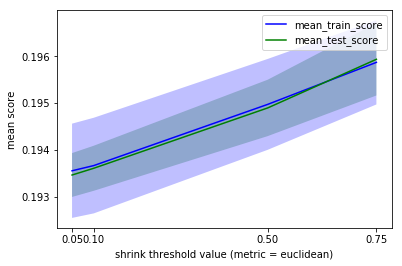

In [93]:
grid_results_nc = pd.DataFrame(grid_nc.cv_results_)
y_train_mean = grid_results_nc.loc[grid_results_nc['param_metric']=='euclidean']['mean_train_score']
y_train_std = grid_results_nc.loc[grid_results_nc['param_metric']=='euclidean']['std_train_score']
y_test_mean = grid_results_nc.loc[grid_results_nc['param_metric']=='euclidean']['mean_test_score']
y_test_std = grid_results_nc.loc[grid_results_nc['param_metric']=='euclidean']['std_test_score']
#gridsearch_cv_model_scores['ridge_regression'] =np.mean(y_test_mean)
x = param_grid_nc['shrink_threshold']
#x=[0.05,0.1,0.5,0.75]
line1,=plt.plot(x,y_train_mean,color='blue')
line2,=plt.plot(x,y_test_mean,color='green')
plt.fill_between(x, y_test_mean - y_test_std,y_test_mean + y_test_std, facecolor = 'green', alpha = 0.25)
plt.fill_between(x, y_train_mean - y_train_std,y_train_mean + y_train_std, facecolor = 'blue', alpha = 0.25)
plt.xticks(x)
plt.legend(handles=[line1,line2])
#plt.xscale('log')
plt.ylabel('mean score')
plt.xlabel('shrink threshold value (metric = euclidean)')

Text(0.5,0,'shrink threshold value (metric = manhattan)')

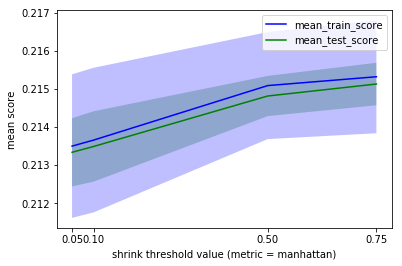

In [94]:
grid_results_nc = pd.DataFrame(grid_nc.cv_results_)
y_train_mean = grid_results_nc.loc[grid_results_nc['param_metric']=='manhattan']['mean_train_score']
y_train_std = grid_results_nc.loc[grid_results_nc['param_metric']=='manhattan']['std_train_score']
y_test_mean = grid_results_nc.loc[grid_results_nc['param_metric']=='manhattan']['mean_test_score']
y_test_std = grid_results_nc.loc[grid_results_nc['param_metric']=='manhattan']['std_test_score']
#gridsearch_cv_model_scores['ridge_regression'] =np.mean(y_test_mean)
x = param_grid_nc['shrink_threshold']
#x=[0.05,0.1,0.5,0.75]
line1,=plt.plot(x,y_train_mean,color='blue')
line2,=plt.plot(x,y_test_mean,color='green')
plt.fill_between(x, y_test_mean - y_test_std,y_test_mean + y_test_std, facecolor = 'green', alpha = 0.25)
plt.fill_between(x, y_train_mean - y_train_std,y_train_mean + y_train_std, facecolor = 'blue', alpha = 0.25)
plt.xticks(x)
plt.legend(handles=[line1,line2])
#plt.xscale('log')
plt.ylabel('mean score')
plt.xlabel('shrink threshold value (metric = manhattan)')

# Changing the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters that are found change? Do they change if you change the random seed of the shuffling? Or if you change the split into training and test data?

In [101]:
param_grid_lr = {'C': [0.001, 0.01, 0.1, 10]}
cv=KFold(n_splits=3,random_state=10,shuffle=True)
grid_lr_kfold = GridSearchCV(lm.LogisticRegression(dual=False,tol=0.005), param_grid_lr,cv=cv,return_train_score=True)
grid_lr_kfold.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.005,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [102]:
param_grid_lr = {'C': [0.001, 0.01, 0.1, 10]}
cv_sfl=KFold(n_splits=3,random_state=0,shuffle=True)
grid_lr_kfold_sfl = GridSearchCV(lm.LogisticRegression(dual=False,tol=0.005), param_grid_lr,cv=cv_sfl,return_train_score=True)
grid_lr_kfold_sfl.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.005,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [103]:
param_grid_svm = {'C': [0.001, 0.01, 0.1, 10]} #, 'gamma':[0.001, 0.01, 0.1, 1]}
grid_svm_kfold = GridSearchCV(LinearSVC(dual=False,tol=0.005), param_grid_svm,cv=cv,return_train_score=True)
grid_svm_kfold.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.005,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [104]:
param_grid_svm = {'C': [0.001, 0.01, 0.1, 10]} #, 'gamma':[0.001, 0.01, 0.1, 1]}
grid_svm_kfold_sfl = GridSearchCV(LinearSVC(dual=False,tol=0.005), param_grid_svm,cv=cv_sfl,return_train_score=True)
grid_svm_kfold_sfl.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.005,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [105]:
param_grid_nc = {'metric': ['euclidean','manhattan'],'shrink_threshold':[0.05,0.1,0.5,0.75]}
grid_nc_kfold = GridSearchCV(NearestCentroid(), param_grid_nc,cv=cv,return_train_score=True)
grid_nc_kfold.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
       error_score='raise',
       estimator=NearestCentroid(metric='euclidean', shrink_threshold=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'metric': ['euclidean', 'manhattan'], 'shrink_threshold': [0.05, 0.1, 0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

**Comparison of best parameter values with/without random seed:**

In [ ]:
param_grid_nc = {'metric': ['euclidean','manhattan'],'shrink_threshold':[0.05,0.1,0.5,0.75]}
grid_nc_kfold_sfl = GridSearchCV(NearestCentroid(), param_grid_nc,cv=cv_sfl,return_train_score=True)
grid_nc_kfold_sfl.fit(x_train, y_train)

In [107]:
grid_lr_kfold.best_params_

{'C': 10}

In [108]:
grid_lr_kfold_sfl.best_params_

{'C': 0.1}

In [109]:
grid_nc_kfold.best_params_

{'metric': 'manhattan', 'shrink_threshold': 0.75}

In [110]:
grid_nc_kfold_sfl.best_params_

{'metric': 'manhattan', 'shrink_threshold': 0.75}

In [111]:
grid_svm_kfold.best_params_

{'C': 0.1}

In [112]:
grid_svm_kfold.best_params_

{'C': 0.1}

We observe that the best parameters do not change with or without random seed for Nearest Centroids and SVM but they change for Logistic Regression.

# Visualizing the coefficients for LogisticRegression and Linear Support Vector Machines.

**Logistic Regression Coefficients:**

Text(0,0.5,'coefficient')

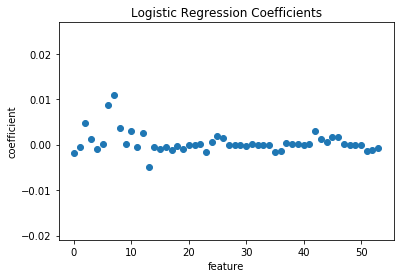

In [119]:
lr_coeff= grid_lr_kfold.best_estimator_
plt.scatter(range(x_train.shape[1]), lr_coeff.coef_[1])
plt.title('Logistic Regression Coefficients')
plt.xlabel('feature')
plt.ylabel('coefficient')

Text(0,0.5,'coefficient')

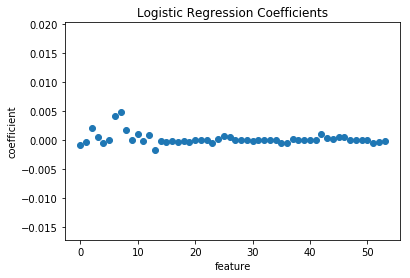

In [120]:
svc_coeff=grid_svm_kfold.best_estimator_
plt.scatter(range(x_train.shape[1]), svc_coeff.coef_[1])
plt.title('Logistic Regression Coefficients')
plt.xlabel('feature')
plt.ylabel('coefficient')

**Both Logistic Regression and SVC approximately agree on the feature weights**